In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [25]:
analysis = scripts.Analysis()

In [26]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_10',
                          'g_descending',
                          'refPTs_P_1_T_250__P_30_T_250__P_300_T_250',
                          'ng_refs_3__2__5',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.6__all.6__all.6',
                          'bigsum',
                          'mdc_0501_63cd4cc',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [27]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_10',
                          'g_descending',
                          'refPTs_P_1_T_250__P_30_T_250__P_300_T_250',
                          'ng_refs_3__2__5',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.6__all.6__all.6',
                          'bigsum',
                          'mdc_0501_63cd4cc',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [28]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 10 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [29]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [30]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [31]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [32]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 10

nband = 330

nv = 200

dv = 0.005

tsfc = 294.0

ng = 10

nref = 3

p_refs = (/ 1,  30, 300 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 3,   2,   5 /)

data wgt
     &     /5 * .6, 2 * .6, 3 * .6/

planck_wgt_flux = 2

include 'mls75.pro'


In [33]:
fig.display_hrefanchor()

In [34]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [35]:
table_dgdgs.display_hrefanchor()

In [36]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [37]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [38]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

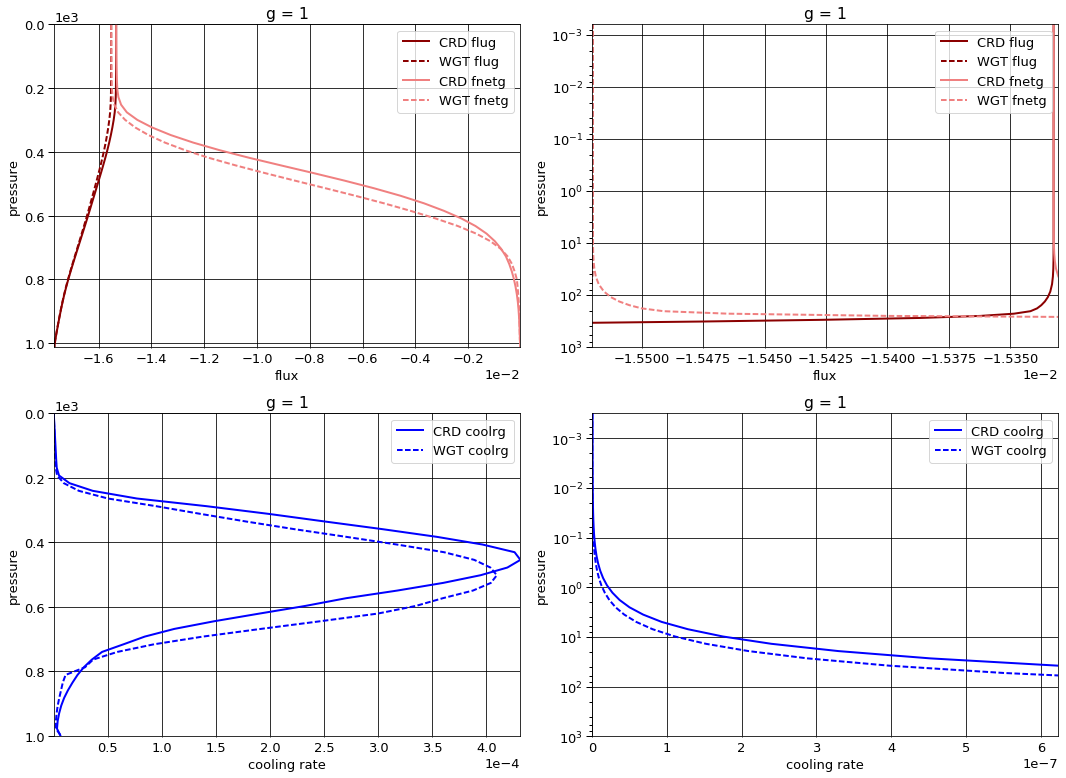

# Figure: flux, cooling rate. g-group 2

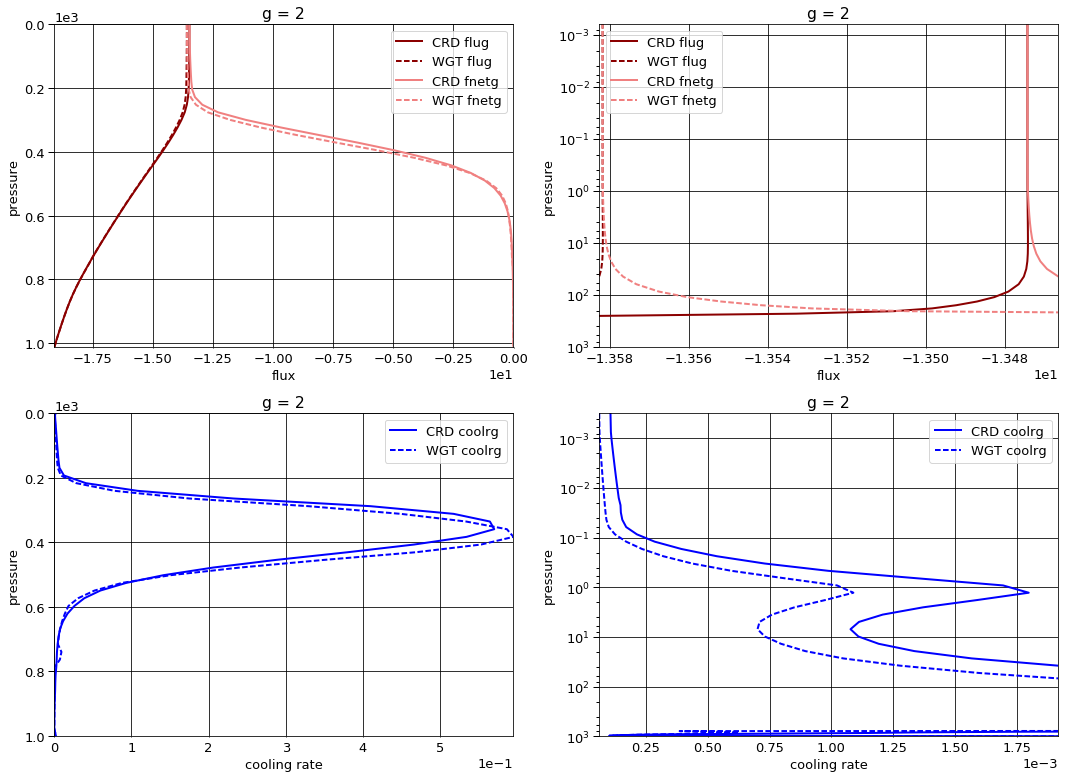

# Figure: flux, cooling rate. g-group 3

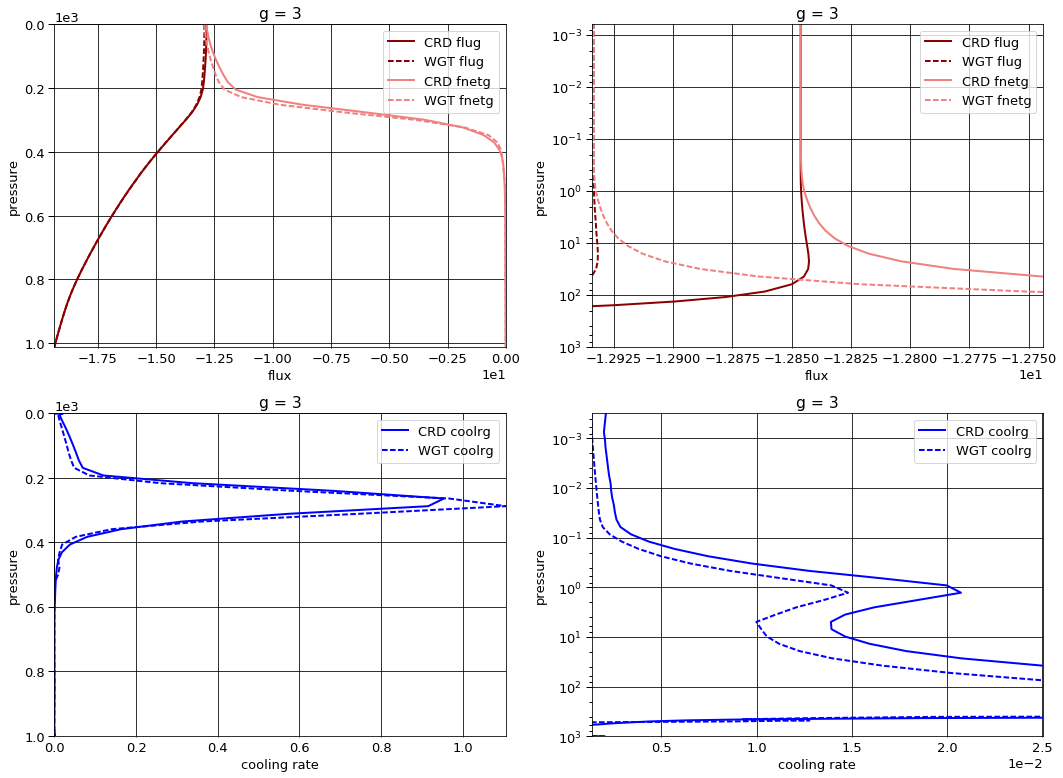

# Figure: flux, cooling rate. g-group 4

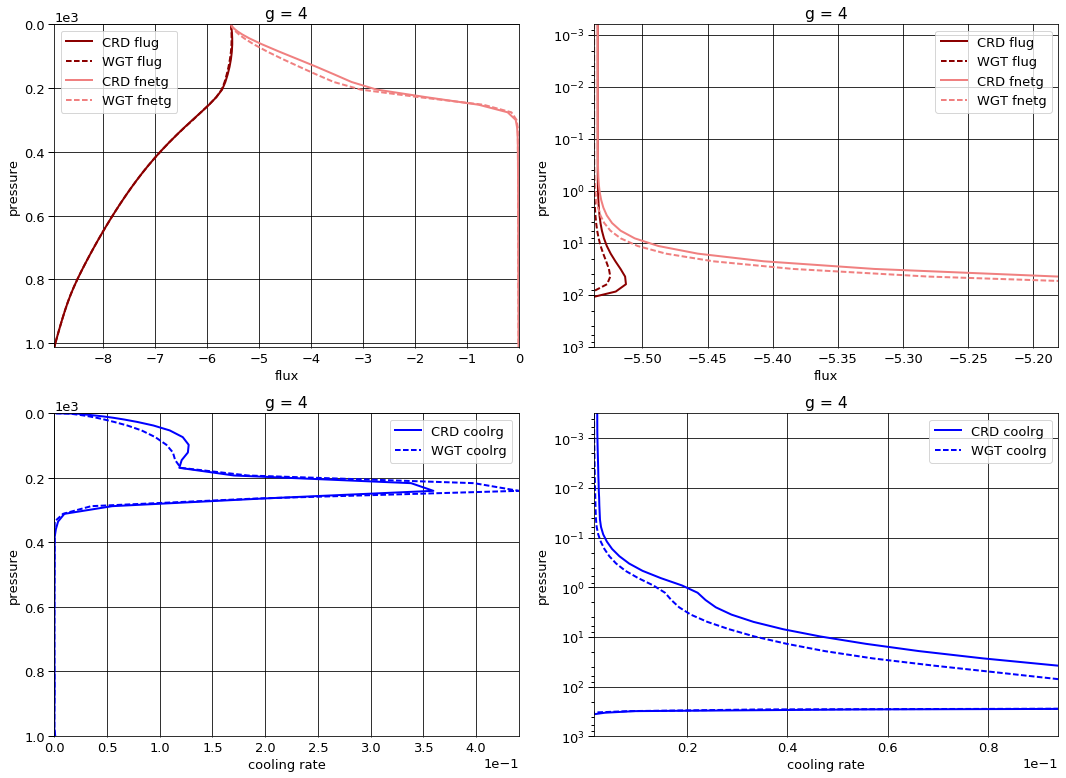

# Figure: flux, cooling rate. g-group 5

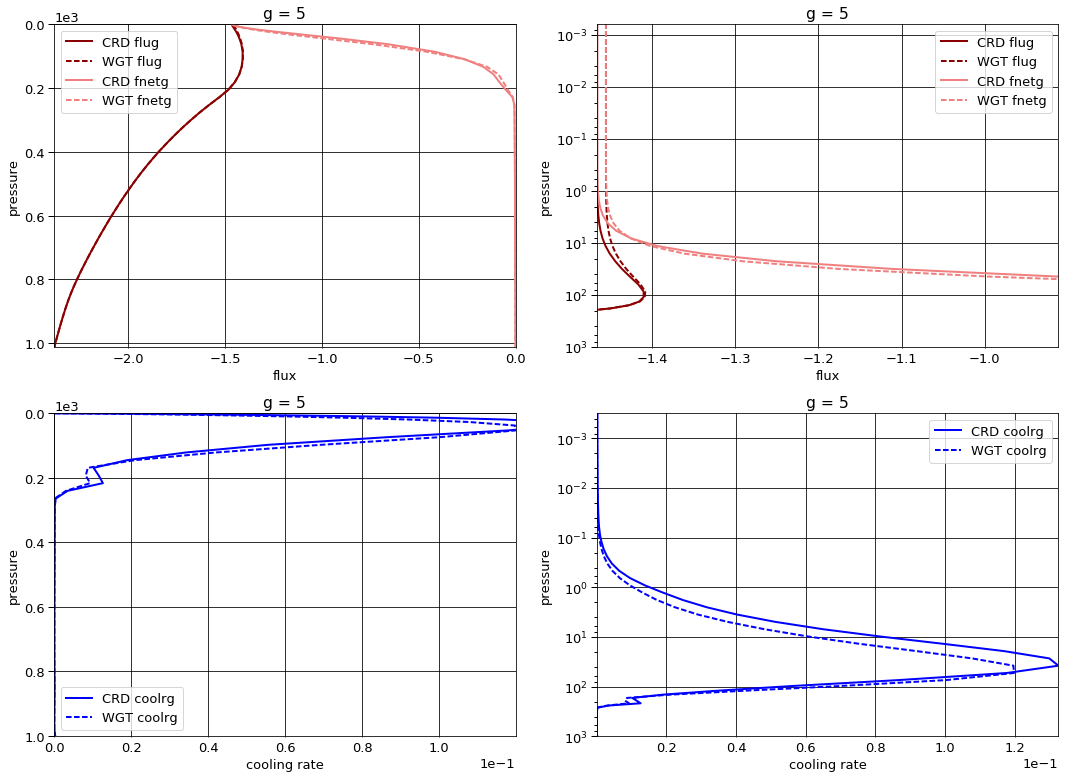

# Figure: flux, cooling rate. g-group 6

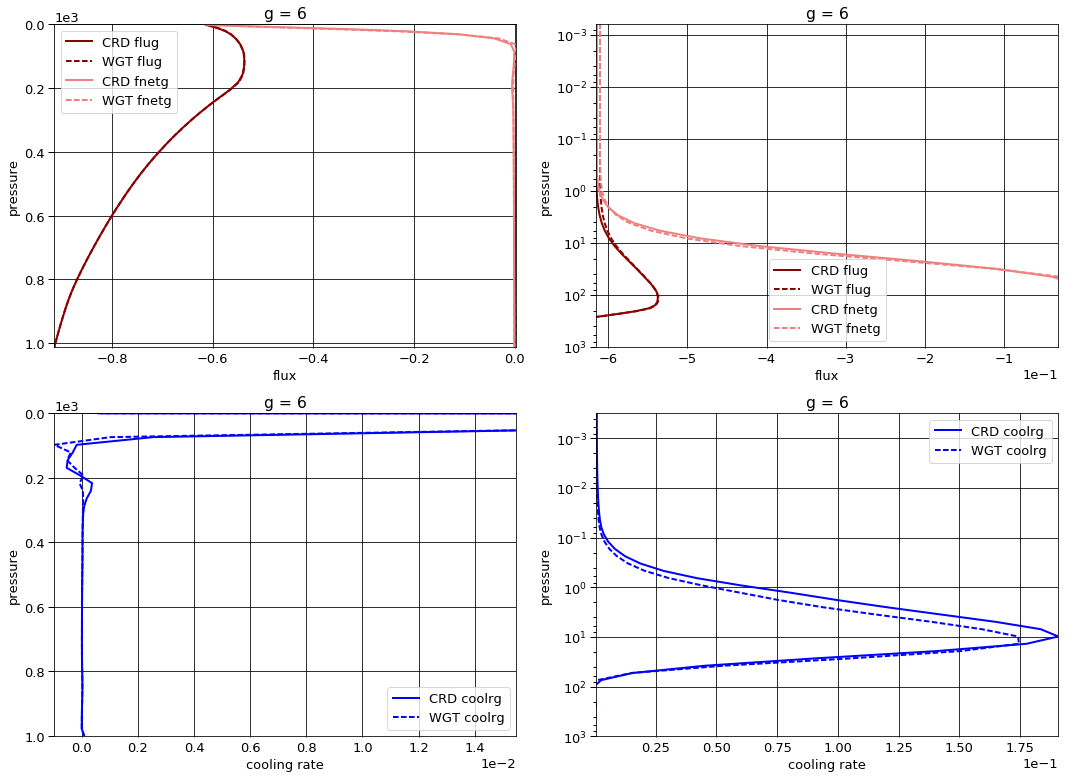

# Figure: flux, cooling rate. g-group 7

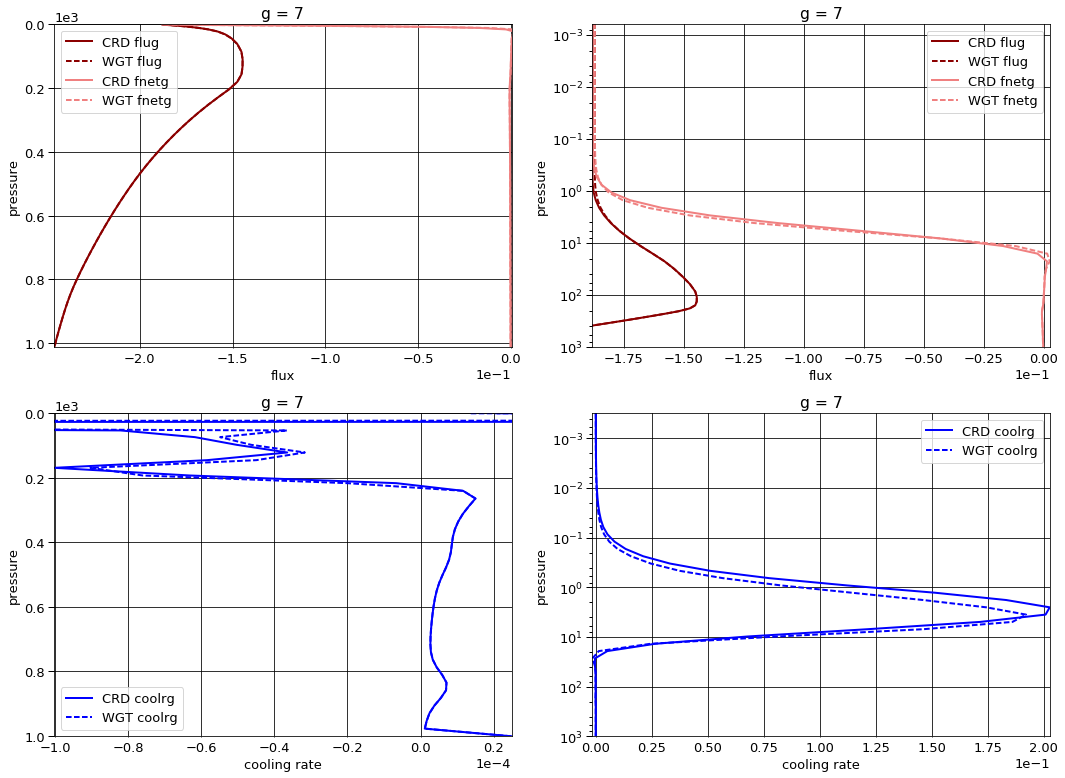

# Figure: flux, cooling rate. g-group 8

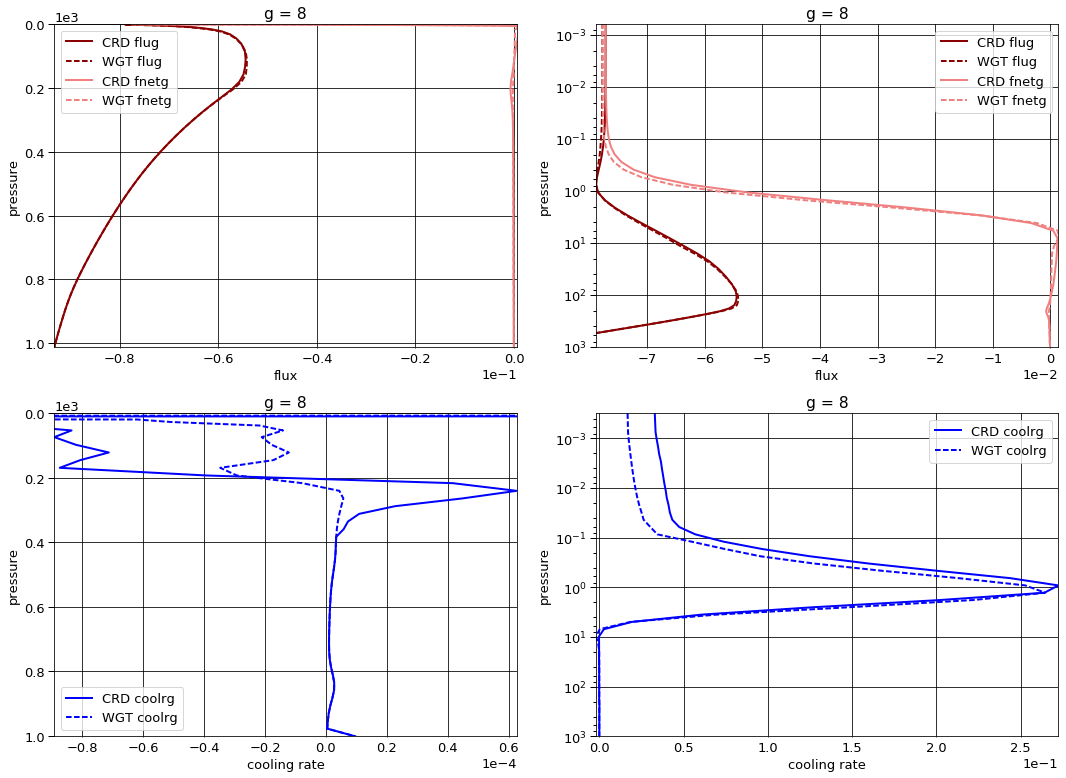

# Figure: flux, cooling rate. g-group 9

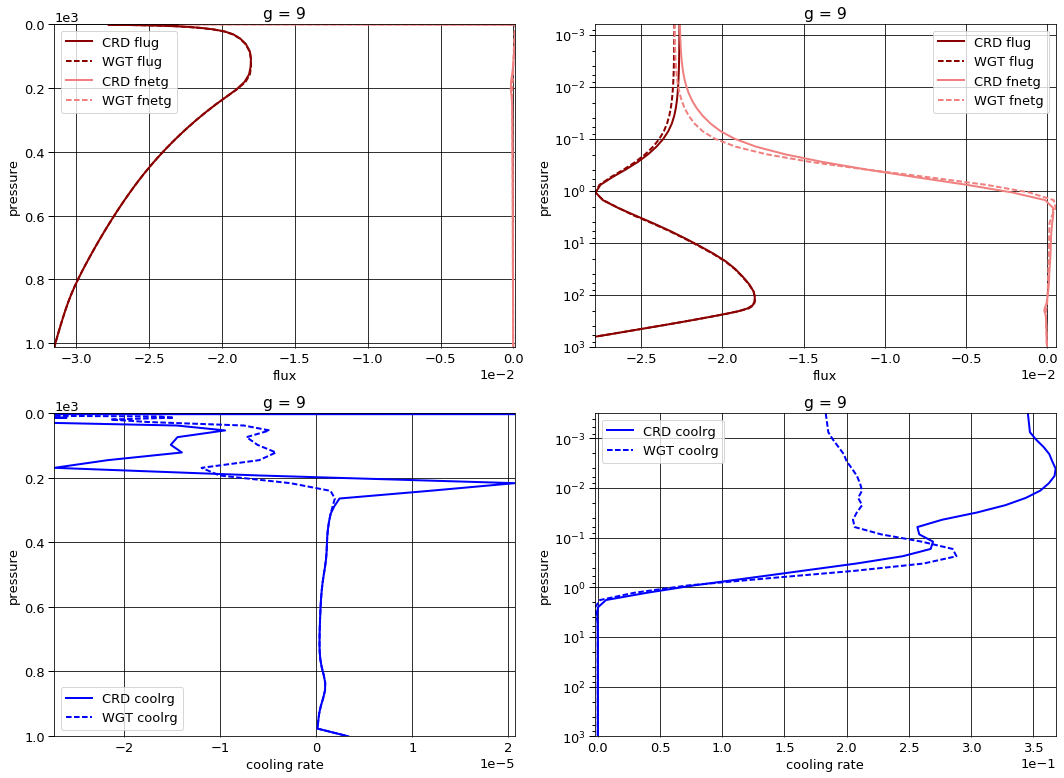

# Figure: flux, cooling rate. g-group 10

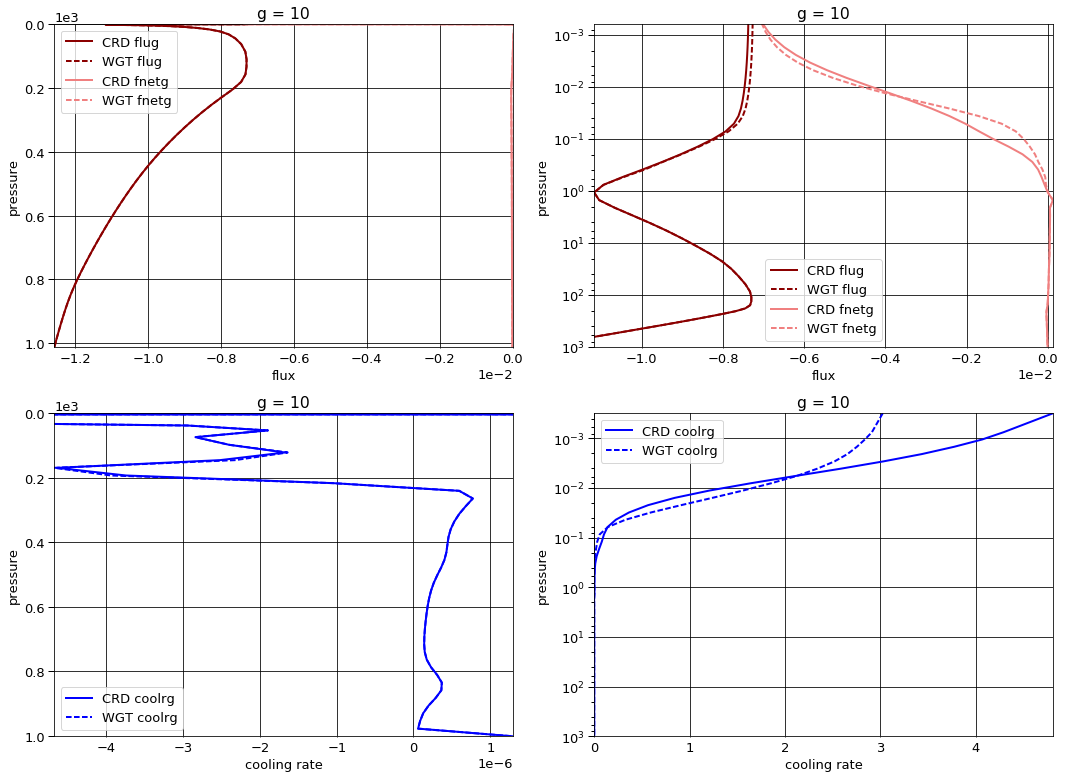

# Figure: flux, cooling rate. g-group total

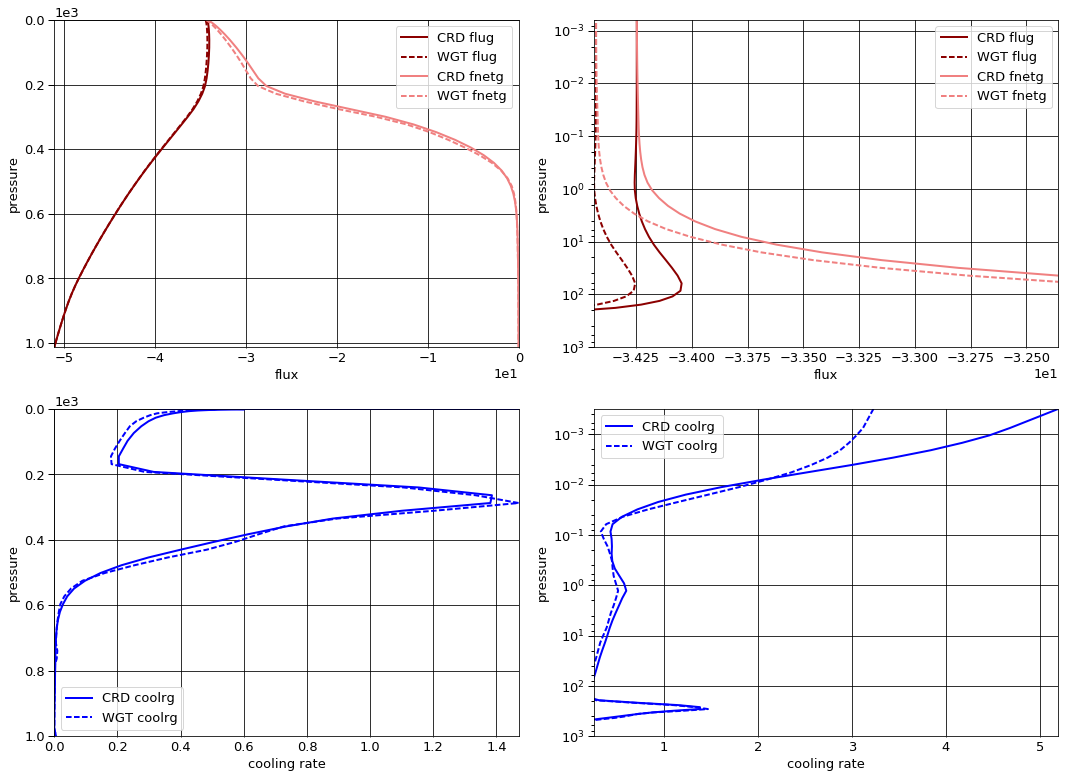

In [39]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [40]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g  pressure level                                 
1  0.0      1      -0.015332   0.000000  -0.015332
   1013.0   76     -0.017674   0.017654  -0.000020
2  0.0      1     -13.474243   0.000000 -13.474243
   1013.0   76    -19.089911  19.083771  -0.006141
3  0.0      1     -12.846158   0.000000 -12.846158
   1013.0   76    -19.366458  19.360900  -0.005558
4  0.0      1      -5.534238   0.000000  -5.534238
   1013.0   76     -8.935717   8.933204  -0.002513
5  0.0      1      -1.465906   0.000000  -1.465906
   1013.0   76     -2.382441   2.381777  -0.000664
6  0.0      1      -0.614951   0.000000  -0.614951
   1013.0   76     -0.914913   0.914656  -0.000257
7  0.0      1      -0.188043   0.000000  -0.188043
   1013.0   76     -0.246120   0.246051  -0.000069
8  0.0      1      -0.077203   0.000000  -0.077203
   1013.0   76     -0.093265   0.093239  -0.000027
9  0.0      1      -0.022643   0.000000  -0.022643
   1013.0   76     -0.031498   0.031489  -0.000009
10 0.0      1      -0.007363   0.000000  -0.007363
   1013.0   76     -0.012576   0.012572  -0.000004


WGT


flug       fldg      fnetg
g  pressure level                                 
1  0.0      1      -0.015520   0.000000  -0.015520
   1013.0   76     -0.017674   0.017655  -0.000019
2  0.0      1     -13.581756   0.000000 -13.581756
   1013.0   76    -19.089911  19.083777  -0.006135
3  0.0      1     -12.933558   0.000000 -12.933558
   1013.0   76    -19.366458  19.360900  -0.005558
4  0.0      1      -5.537071   0.000000  -5.537071
   1013.0   76     -8.935717   8.933204  -0.002513
5  0.0      1      -1.455330   0.000000  -1.455330
   1013.0   76     -2.382441   2.381777  -0.000664
6  0.0      1      -0.610414   0.000000  -0.610414
   1013.0   76     -0.914913   0.914656  -0.000257
7  0.0      1      -0.187119   0.000000  -0.187119
   1013.0   76     -0.246120   0.246051  -0.000069
8  0.0      1      -0.077770   0.000000  -0.077770
   1013.0   76     -0.093265   0.093239  -0.000027
9  0.0      1      -0.022960   0.000000  -0.022960
   1013.0   76     -0.031498   0.031489  -0.000009
10 0.0      1      -0.007259   0.000000  -0.007259
   1013.0   76     -0.012576   0.012572  -0.000004


WGT - CRD


flug          fldg         fnetg
g  pressure level                                      
1  0.0      1     -0.000188  0.000000e+00 -1.875630e-04
   1013.0   76     0.000000  6.670000e-07  6.662640e-07
2  0.0      1     -0.107513  0.000000e+00 -1.075130e-01
   1013.0   76     0.000000  6.000000e-06  5.871500e-06
3  0.0      1     -0.087400  0.000000e+00 -8.740000e-02
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
4  0.0      1     -0.002833  0.000000e+00 -2.833200e-03
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
5  0.0      1      0.010576  0.000000e+00  1.057640e-02
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
6  0.0      1      0.004538  0.000000e+00  4.537540e-03
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
7  0.0      1      0.000924  0.000000e+00  9.240600e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
8  0.0      1     -0.000567  0.000000e+00 -5.672450e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
9  0.0      1     -0.000317  0.000000e+00 -3.170250e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
10 0.0      1      0.000105  0.000000e+00  1.045617e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      8.622885e-10
   1001.112500 75     6.418510e-06
2  0.000312    1      1.063288e-04
   1001.112500 75     2.220411e-03
3  0.000312    1      2.087442e-03
   1001.112500 75     2.009882e-03
4  0.000312    1      2.088751e-03
   1001.112500 75     9.087686e-04
5  0.000312    1      2.209659e-04
   1001.112500 75     2.402808e-04
6  0.000312    1      7.063875e-04
   1001.112500 75     9.282491e-05
7  0.000312    1      2.117528e-05
   1001.112500 75     2.489865e-05
8  0.000312    1      3.290768e-02
   1001.112500 75     9.606658e-06
9  0.000312    1      3.455588e-01
   1001.112500 75     3.335058e-06
10 0.000312    1      4.811295e+00
   1001.112500 75     1.298412e-06


WGT


coolrg
g  pressure    layer              
1  0.000312    1      5.043658e-10
   1001.112500 75     7.100574e-06
2  0.000312    1      6.084996e-05
   1001.112500 75     2.217881e-03
3  0.000312    1      1.333921e-03
   1001.112500 75     2.009882e-03
4  0.000312    1      1.454714e-03
   1001.112500 75     9.087686e-04
5  0.000312    1      1.451646e-04
   1001.112500 75     2.402808e-04
6  0.000312    1      5.604283e-04
   1001.112500 75     9.282491e-05
7  0.000312    1      1.373713e-05
   1001.112500 75     2.489865e-05
8  0.000312    1      1.677525e-02
   1001.112500 75     9.606658e-06
9  0.000312    1      1.831333e-01
   1001.112500 75     3.335058e-06
10 0.000312    1      3.025895e+00
   1001.112500 75     1.298412e-06


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -3.579227e-10
   1001.112500 75     6.820639e-07
2  0.000312    1     -4.547881e-05
   1001.112500 75    -2.530700e-06
3  0.000312    1     -7.535210e-04
   1001.112500 75     0.000000e+00
4  0.000312    1     -6.340374e-04
   1001.112500 75     0.000000e+00
5  0.000312    1     -7.580128e-05
   1001.112500 75     0.000000e+00
6  0.000312    1     -1.459592e-04
   1001.112500 75     0.000000e+00
7  0.000312    1     -7.438150e-06
   1001.112500 75     0.000000e+00
8  0.000312    1     -1.613243e-02
   1001.112500 75     0.000000e+00
9  0.000312    1     -1.624255e-01
   1001.112500 75     0.000000e+00
10 0.000312    1     -1.785400e+00
   1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.246081,0.000000,-34.246081
1013.0,76,-51.090573,51.075313,-0.015261



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.428756,0.000000,-34.428756
1013.0,76,-51.090573,51.075319,-0.015254



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.182675,0.000000,-0.182675
1013.0,76,0.000000,0.000007,0.000007


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,5.194992
1001.112500,75,0.005518



WGT


,,coolrg
pressure,layer,
0.000312,1,3.229373
1001.112500,75,0.005516



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-1.965620
1001.112500,75,-0.000002


In [41]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.020712,0.000390
2,0.282879,0.364681
3,0.407348,0.383477
4,0.204121,0.178004
5,0.055864,0.047581
6,0.020621,0.018237
7,0.005545,0.004909
8,0.001985,0.001851
9,0.000636,0.000620


In [42]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.792420e-23
2,1.795384e-22
3,1.798354e-21
4,1.801328e-20
5,1.804307e-19
6,1.968183e-19
7,2.005604e-18
8,8.065117e-19
9,8.419143e-18


In [43]:
def spreadsheet():
    ng = 10
    ng_refs = [3, 2, 5]
    p_refs = [1, 30, 300]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [44]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.792420e-23,NaN,0.020712,0.000390,0.020712,0.000390,300.0
2,1.795384e-22,NaN,0.282879,0.364681,0.303591,0.365072,300.0
3,1.798354e-21,10.016538,0.407348,0.383477,0.710939,0.748548,300.0
4,1.801328e-20,10.016538,0.204121,0.178004,0.915061,0.926552,300.0
5,1.804307e-19,10.016538,0.055864,0.047581,0.970924,0.974134,300.0
6,1.968183e-19,1.090825,0.020621,0.018237,0.991545,0.992371,30.0
7,2.005604e-18,10.190132,0.005545,0.004909,0.997091,0.997280,30.0
8,8.065117e-19,0.402129,0.001985,0.001851,0.999076,0.999131,1.0
9,8.419143e-18,10.438959,0.000636,0.000620,0.999712,0.999751,1.0


In [45]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

In [46]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')